<a href="https://colab.research.google.com/github/laharimalla/CodeClause/blob/main/EMPLOYEEATTRITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Employee Attrition




In [28]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys,traceback
from sklearn.utils import resample

In [29]:
hr_data=pd.read_csv('/content/drive/MyDrive/employee/train.csv')


In [30]:
hr = hr_data
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary', 'Attrition']

Sample data:


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [31]:
hr=hr.rename(columns = {'Department':'department'})
#Display data type for each column
hr.dtypes


satisfaction_level        float64
last_evaluation_rating    float64
projects_worked_on          int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
department                 object
salary                     object
Attrition                   int64
dtype: object

Text(0.5, 1.0, 'Missed Data')

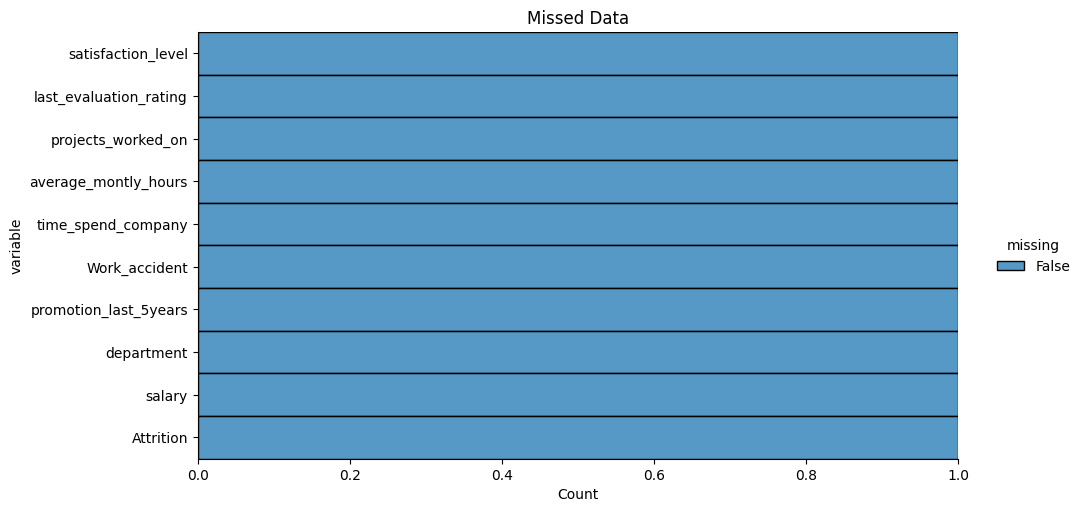

In [32]:
#Check for Missing Values
sns.displot(
    data=hr.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
);
plt.title('Missed Data')

In [33]:
hr.shape

(25491, 10)

In [34]:
hr.describe()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.021419,0.234985
std,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.144780,0.423998
min,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


In [35]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [36]:
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [37]:
print(hr['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


DATA EXPLORATION

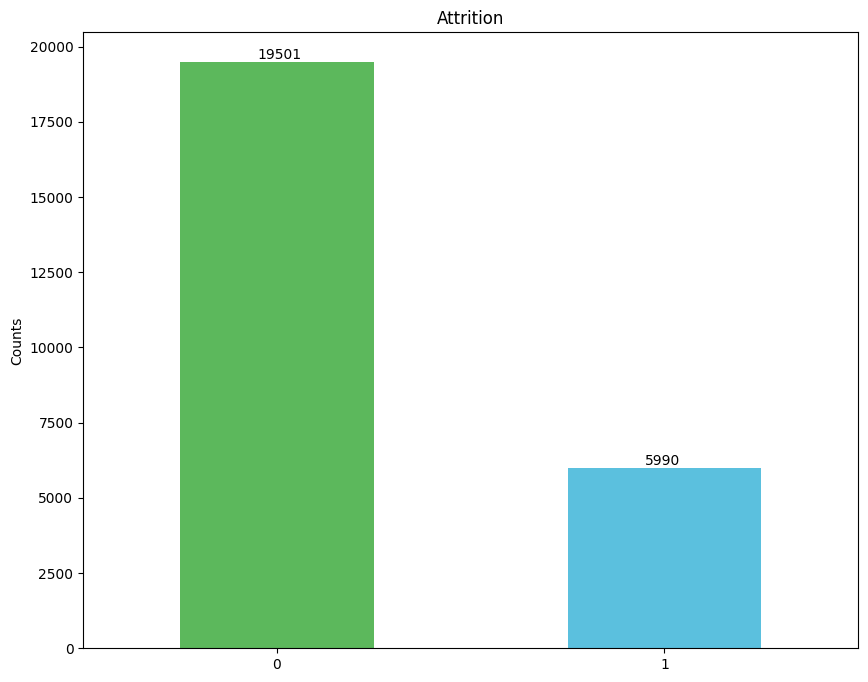

In [39]:
colors = ['#5cb85c', '#5bc0de']
ax = hr['Attrition'].value_counts().plot(kind='bar', color=colors, figsize=(10, 8), rot=0, ylabel='Counts', title="Attrition")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))

Finding Imbalanced Problem in Data

In [40]:
hr_0 = hr[hr['Attrition'] == 0]
hr_1 = hr[hr['Attrition'] == 1]

In [41]:
hr_0_downsample = resample(hr_0,replace=False,n_samples=6000)
hr_0_downsample.shape

(6000, 10)

In [42]:
hr.shape

(25491, 10)

In [43]:
hr['Attrition'].value_counts()

0    19501
1     5990
Name: Attrition, dtype: int64

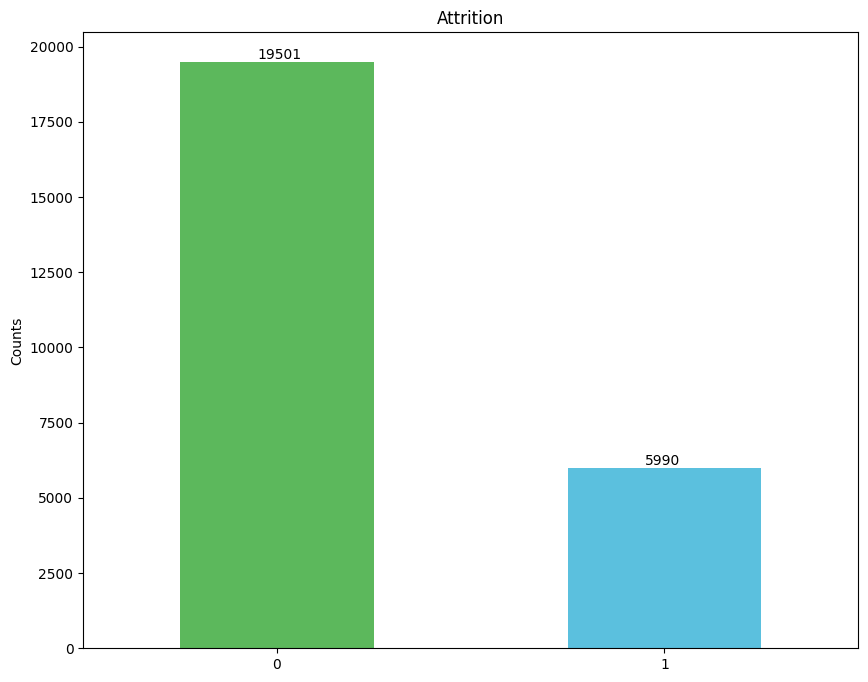

In [44]:
colors = ['#5cb85c', '#5bc0de']
ax = hr['Attrition'].value_counts().plot(kind='bar', color=colors, figsize=(10, 8), rot=0, ylabel='Counts', title="Attrition")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))

In [45]:
hr.groupby('Attrition').mean()

<ipython-input-45-873846336629>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr.groupby('Attrition').mean()


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Attrition,,,,,,,
0,6.668899,7.159582,4.198041,203.199836,3.378647,0.176247,0.026665
1,4.408347,7.194691,4.270952,212.081302,3.882972,0.047579,0.004341


In [46]:
hr.groupby('department').mean()

<ipython-input-46-ff20af930eb2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr.groupby('department').mean()


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
department,,,,,,,,
RandD,6.186966,7.095356,4.250936,204.902622,3.361049,0.173783,0.034457,0.153558
accounting,5.835790,7.193845,4.224924,205.725684,3.530395,0.127660,0.018237,0.265957
hr,6.037272,7.072720,4.078509,203.311657,3.357653,0.122125,0.021412,0.283902
management,6.218932,7.247423,4.262418,205.244611,4.299906,0.160262,0.111528,0.134958
marketing,6.200756,7.165430,4.087973,203.987629,3.578694,0.158763,0.050172,0.229553
product_mng,6.200727,7.185535,4.223910,203.686262,3.456407,0.149934,0.000000,0.218626
sales,6.164850,7.110125,4.183995,205.039581,3.541804,0.143984,0.023519,0.240212
technical,6.137237,7.212923,4.257805,206.091864,3.410974,0.145222,0.008798,0.245317


DATA VISUALIZATION

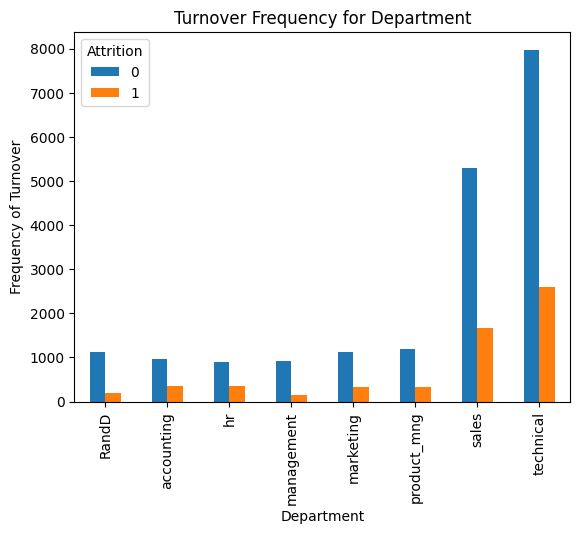

In [47]:
pd.crosstab(hr['department'],hr['Attrition']).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

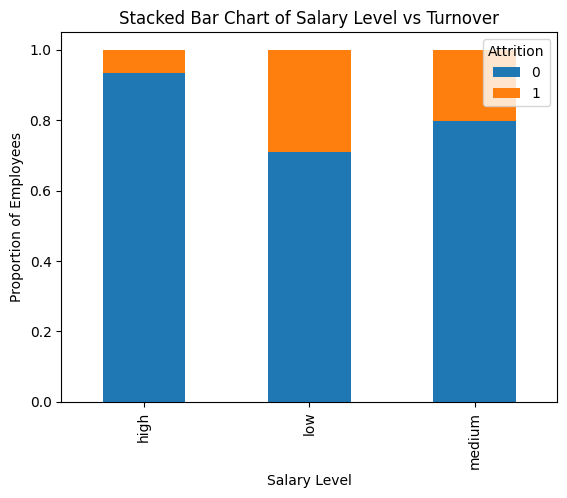

In [48]:
table=pd.crosstab(hr.salary, hr.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [49]:
pd.crosstab(hr.department, hr.Attrition)

Attrition,0,1
department,,
RandD,1130,205
accounting,966,350
hr,903,358
management,923,144
marketing,1121,334
product_mng,1183,331
sales,5298,1675
technical,7977,2593


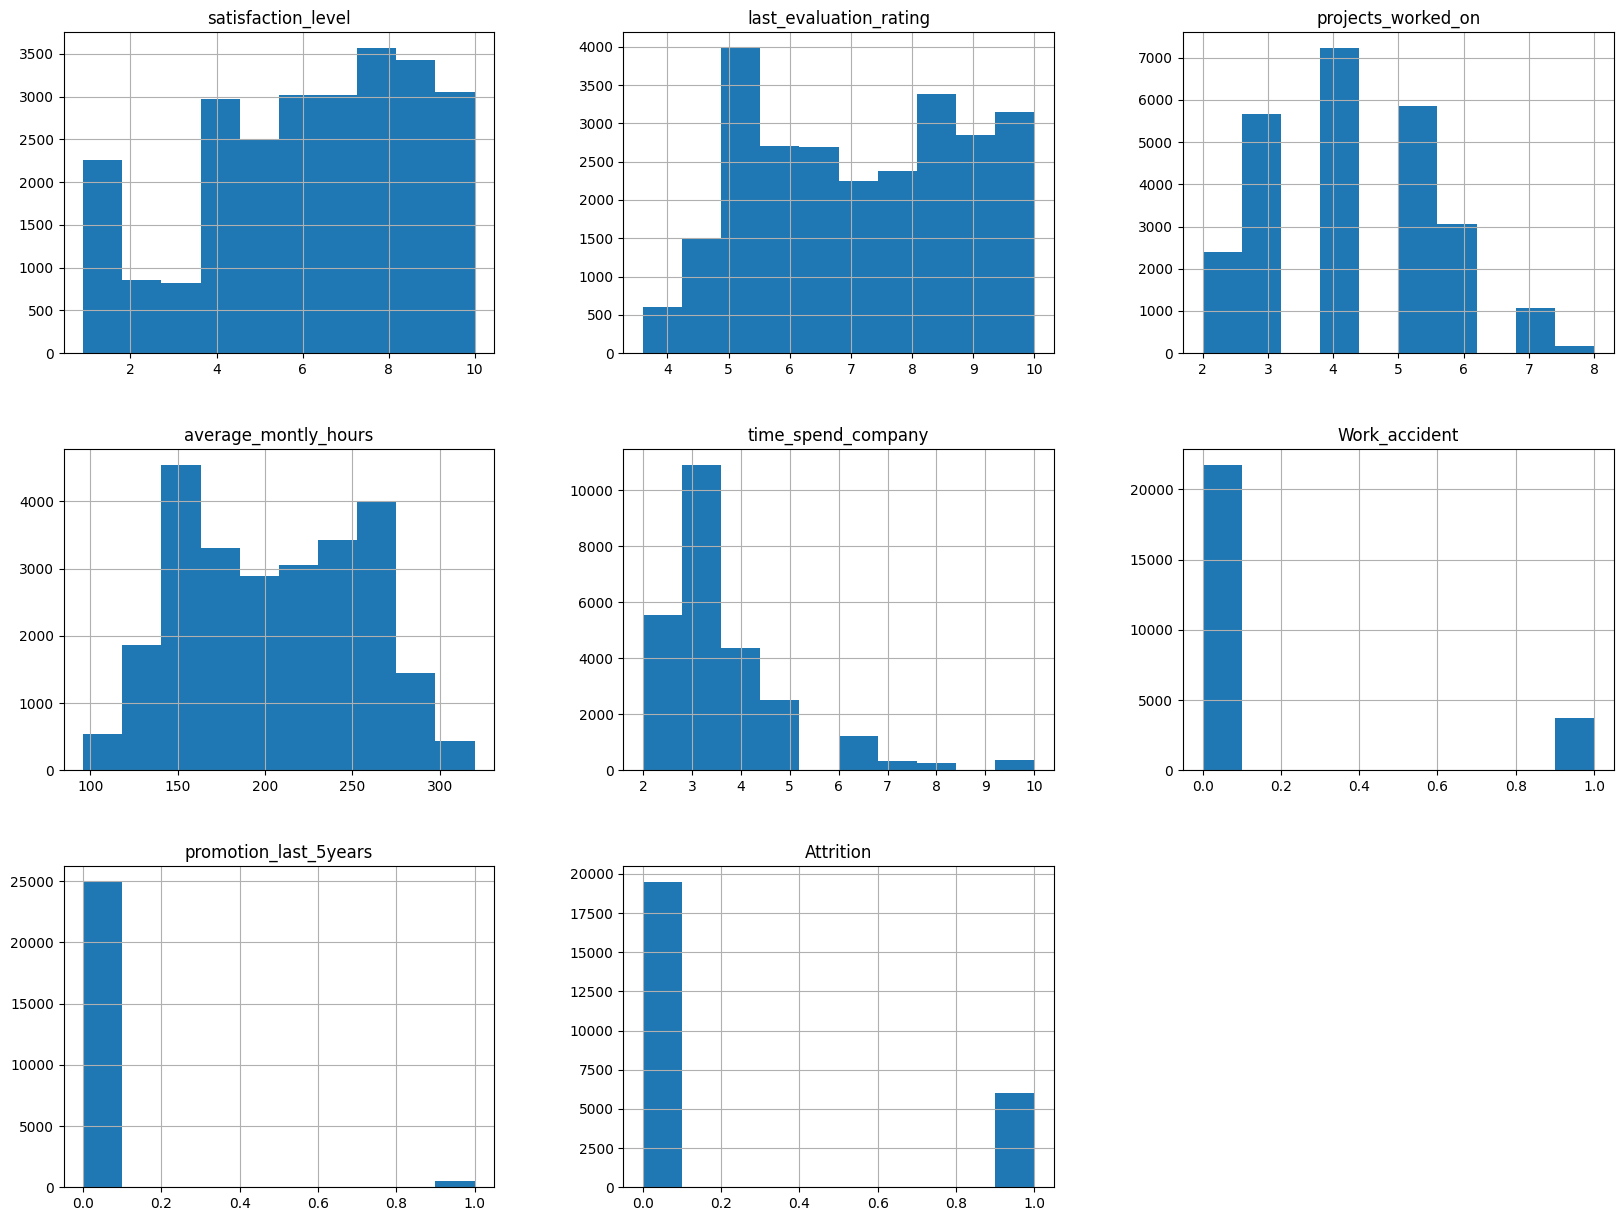

In [50]:
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [51]:
hr.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [52]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [53]:
hr.drop(hr.columns[[7, 8]], axis=1, inplace=True)

In [54]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation_rating',
       'projects_worked_on', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'Attrition',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [55]:
hr_vars=hr.columns.values.tolist()
y=['Attrition']
X=[i for i in hr_vars if i not in y]

In [56]:
X

['satisfaction_level',
 'last_evaluation_rating',
 'projects_worked_on',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

Feature Selection

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)

rfe = RFE(model, n_features_to_select = 10)
rfe = rfe.fit(hr[X], hr[y].values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True  True  True  True False  True  True False
 False False False  True  True  True]
[1 3 2 9 1 1 1 1 4 1 1 6 8 7 5 1 1 1]


In [58]:
cols=['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium']
X=hr[cols]
y=hr['Attrition']

LOGISTIC REGRESSION

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [61]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.766


RANDOM FOREST

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.965


10 FOLD CROSS VALIDATION

In [64]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

cross validation average accuracy for Random Forest Classifier: 0.962


CLASSIFICATION REPORT

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5840
           1       0.92      0.94      0.93      1808

    accuracy                           0.96      7648
   macro avg       0.95      0.96      0.95      7648
weighted avg       0.97      0.96      0.96      7648



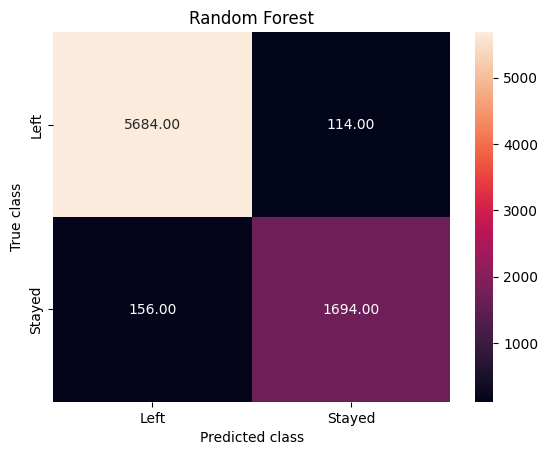

In [66]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

FOR LOGISTIC REGRESSION

In [67]:
print(classification_report(y_test, logreg.predict(X_test)))


              precision    recall  f1-score   support

           0       0.80      0.92      0.86      5840
           1       0.51      0.26      0.34      1808

    accuracy                           0.77      7648
   macro avg       0.66      0.59      0.60      7648
weighted avg       0.73      0.77      0.74      7648



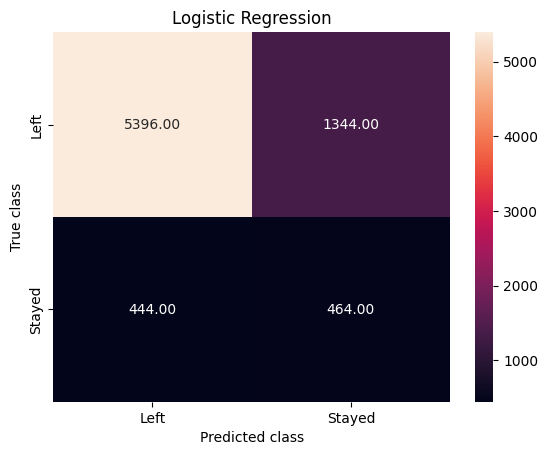

In [68]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

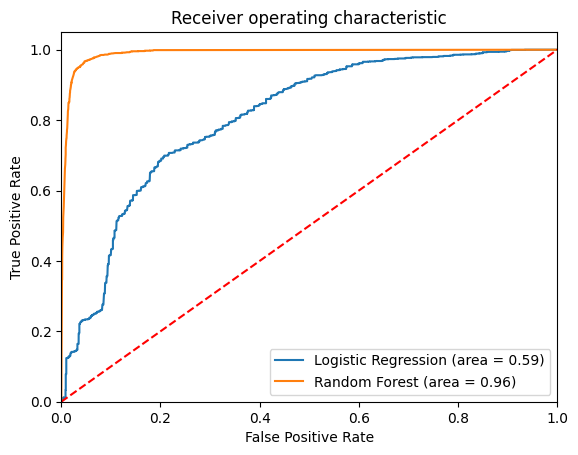

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#ROC for logistic regression
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

#ROC for Random Forrest
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

#ROC Curve for Random Forest & Logistic Regression
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

VARIABLE IMPORTANCE OF RANDOM CLASSIFIER

In [71]:
feature_labels = X_train.columns
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.32%
department_hr-0.36%
salary_medium-0.40%
department_RandD-0.41%
promotion_last_5years-0.48%
salary_high-0.70%
salary_low-1.10%
Work_accident-2.25%
time_spend_company-32.54%
satisfaction_level-61.43%


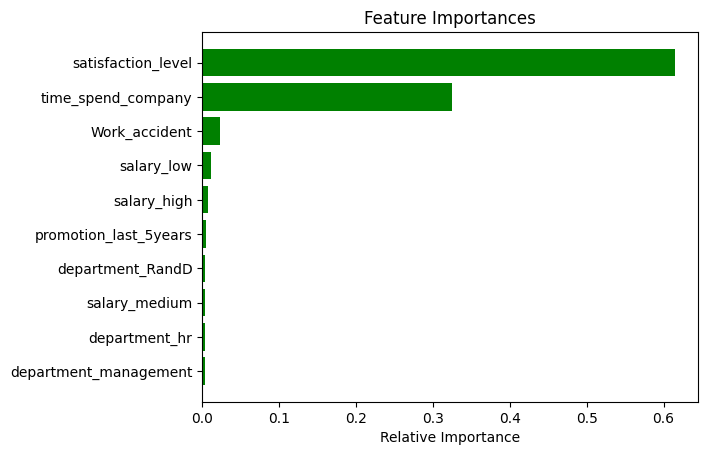

In [72]:
plt.title('Feature Importances')
plt.barh(range(len(feature_indexes_by_importance)), importance[feature_indexes_by_importance], color='g', align='center')
plt.yticks(range(len(feature_indexes_by_importance)), [feature_labels[i] for i in feature_indexes_by_importance])
plt.xlabel('Relative Importance')
plt.show()